In [32]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline
plt.style.use('/Users/summer/desktop/notebook.mplstyle');
%config InlineBackend.figure_format = 'retina'
colors = ["#2078B5", "#FF7F0F", "#2CA12C", "#D72827", "#9467BE", "#8C574B",
            "#E478C2", "#808080", "#BCBE20", "#17BED0", "#AEC8E9", "#FFBC79", 
            "#98E08B", "#FF9896", "#C6B1D6", "#C59D94", "#F8B7D3", "#C8C8C8", 
           "#DCDC8E", "#9EDAE6"]

In [33]:
F = 14
c = 10
b = 10
h = 1
dt = 0.001
totstep = 50
Jmax = 51
Imax = 51
I=4
J=4

ST = 1000

In [34]:
x = np.load('xlisttxt.npy')
y = np.load('ylisttxt.npy')
#x = np.random.rand(I)
#y = np.random.rand(J,I)

In [35]:
def lorenz96(xy,i,j):

    xy_dot[i] = (xy[0:I][(i-1)%I] * (xy[0:I][(i+1)%I] - xy[0:I][(i-2)%I]) - xy[0:I][i%I] + F - h*c/b*(np.sum([xy[I::][i::I]])))    
    xy_dot[I+j*I+i] = (c*b*xy[I:][((j+1)%J)*I+i]*(xy[I:][((j-1)%J)*I+i]-xy[I:][((j+2)%J)*I+i])-c*xy[I:][((j)%J)*I+i]+h*c/b*xy[0:I][i])

    return xy_dot

In [36]:
def RK4(xylist,step,i,j):
    
    oldxy = xylist[((I+J*I)*(step-1)):((I+J*I)*(step))]
    k1 = dt*lorenz96(oldxy,i,j)
    k2 = dt*lorenz96(oldxy + k1*0.5*dt,i,j)
    k3 = dt*lorenz96(oldxy + k2*0.5*dt,i,j)
    k4 = dt*lorenz96(oldxy + k3*dt,i,j)

    return oldxy + (k1 + 2*k2 + 2*k3 + k4)/6

In [37]:
def J4LE(xnow,x4jj,y4jj,i):   

    x4jj[(i)%I][(i)%I]  = (xnow[(i-1)%I] * (xnow[(i+1)%I] - xnow[(i-2)%I]) - 1 + F - h*c/b*(np.sum([y4jj[i::I]])))
    x4jj[(i)%I][(i-1)%I]  = (xnow[(i+1)%I] - xnow[(i-2)%I]) - xnow[i%I] + F - h*c/b*(np.sum([y4jj[i::I]]))
    x4jj[(i)%I][(i-2)%I]  = (xnow[(i-1)%I] * xnow[(i+1)%I] -  xnow[(i-2)%I]) - xnow[i%I] + F - h*c/b*(np.sum([y4jj[i::I]])) 
    x4jj[(i)%I][(i+1)%I]  = (xnow[(i-1)%I] - xnow[(i-1)%I] * xnow[(i-2)%I]) - xnow[i%I] + F - h*c/b*(np.sum([y4jj[i::I]])) 
    
    #y4jj[j*I+i] = c*b*y4jj[((j+1)%J)*I+i]*(y4jj[((j-1)%J)*I+i]-y4jj[((j+2)%J)*I+i])-c*y4jj[((j)%J)*I+i]+h*c/b 
                                  
    return x4jj                 

In [38]:
def RK4JJ(xnow,x4jj,y4jj,i,j):
    
    k1 = dt*J4LE(xnow,x4jj, y4jj, i)
    k2 = dt*J4LE(xnow,x4jj + k1*0.5*dt,y4jj, i)    
    k3 = dt*J4LE(xnow,x4jj + k2*0.5*dt,y4jj, i)
    k4 = dt*J4LE(xnow,x4jj + k3*dt ,y4jj, i)
    
    return x4jj + (k1 + 2*k2 + 2*k3 + k4)/6

In [39]:
#m = len(x1)
LE = np.zeros((Jmax-3,Imax-7))

In [40]:
#for I in np.arange(4,Imax,1):
#    for J in np.arange(8,Jmax,1):
xjj = np.zeros((I,I))
yjj = np.zeros((I*J))
xnow = np.zeros((I))

slowxylist = np.zeros([(ST*totstep)*(I+J*I)])
#xylist = np.zeros([(totstep)*(I+J*I)])
newx=[]
newlist = []

for ii in range(I):
    slowxylist[ii] = x[ii]

newx.append([x[ii] for ii in range(len(x))])

for jjj in range(J):
    for iii in range(I):
        slowxylist[I + jjj*I + iii] = y[jjj,iii]
        
for step in np.arange(1,totstep,1):   
    for time in np.arange(1,ST,1):
        xy_dot= np.zeros((I+J*I))
        for i in range(I):
            for j in range(J): 
                slowxylist[(I+J*I)*(time+ST*(step-1)):(I+J*I)*(time+1+ST*(step-1))] = RK4(slowxylist,time+ST*(step-1), i,j)
                #xylist[(I+J*I)*(step):(I+J*I)*(step+1)] = RK4(xylist,step, i,j) 
                newlist = slowxylist[(I+J*I)*(time+ST*(step-1)):(I+J*I)*(time+1+ST*(step-1))][0:I]   
                #newlist = xylist[(I+J*I)*(step):(I+J*I)*(step+1)][0:I] 
            newx.append([newlist[ij] for ij in range(len(newlist))])  
            
        #x1slow.append([newx[a][0] for a in range(len(newx))])       
        #x2slow.append([newx[a][1] for a in range(len(newx))])
        #x3slow.append([newx[a][2] for a in range(len(newx))])
        #x4slow.append([newx[a][3] for a in range(len(newx))])
        x1 = np.array([newx[a][0] for a in range(len(newx))])
        x2 = np.array([newx[a][1] for a in range(len(newx))])
        x3 = np.array([newx[a][2] for a in range(len(newx))])
        x4 = np.array([newx[a][3] for a in range(len(newx))])
        
    #x1quick = np.array([x1slow[tt*(100)] for tt in range((len(x1slow))/(100))])       
    #x2quick = np.array([x2slow[tt*(100)] for tt in range((len(x1slow))/(100))])   
    #x3quick = np.array([x3slow[tt*(100)] for tt in range((len(x1slow))/(100))])   
    #x4quick = np.array([x4slow[tt*(100)] for tt in range((len(x1slow))/(100))])      

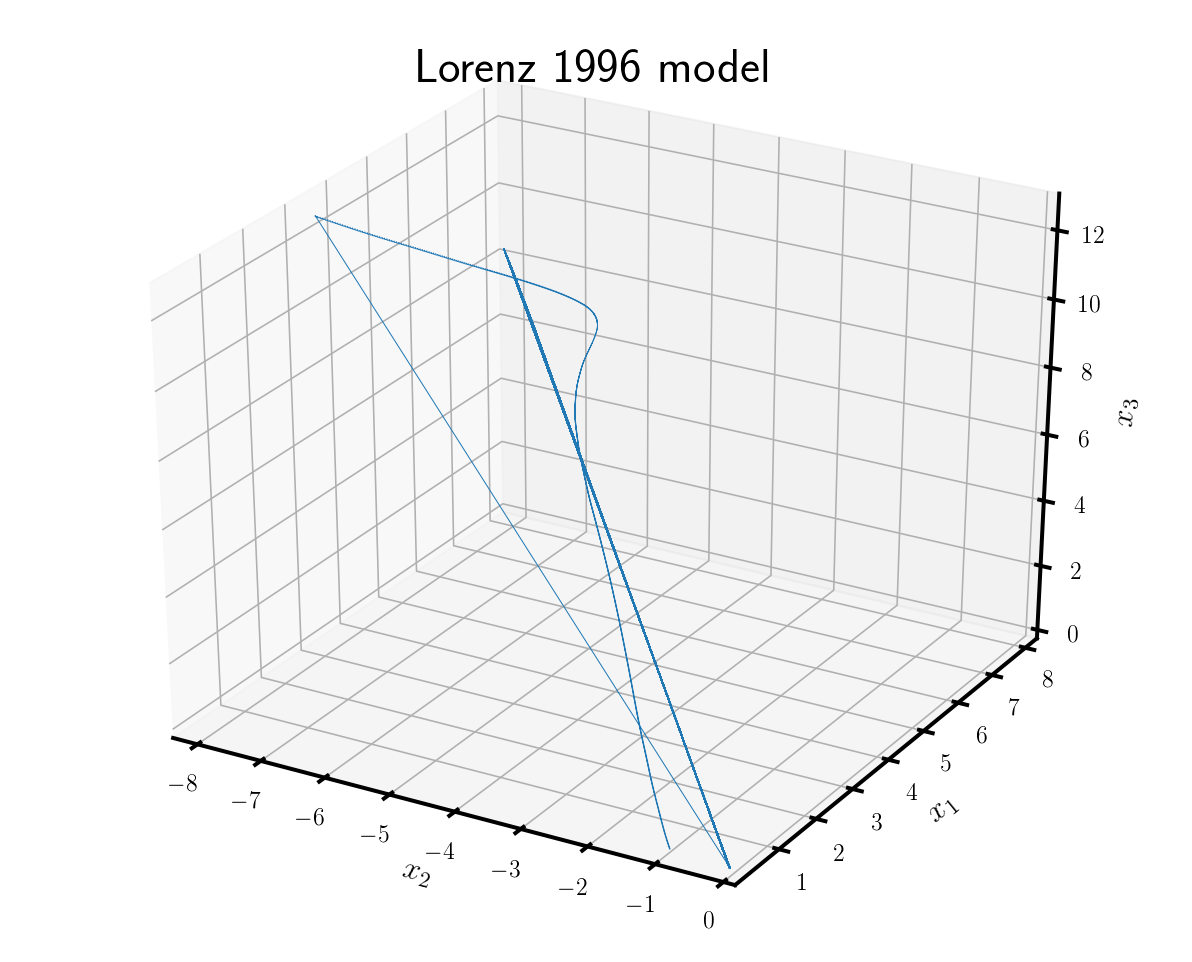

In [41]:
fig = plt.figure(figsize=(10,8))
#ax = fig.gca(projection='3d')
ax = fig.add_subplot(111, projection='3d')
ax.plot(-x2, x1, x3,lw=0.5)
ax.set_xlabel("$x_2$")
ax.set_ylabel("$x_1$")
#plt.xlim(4, -12)
ax.set_zlabel("$x_3$")
ax.set_title("Lorenz 1996 model")
plt.show()

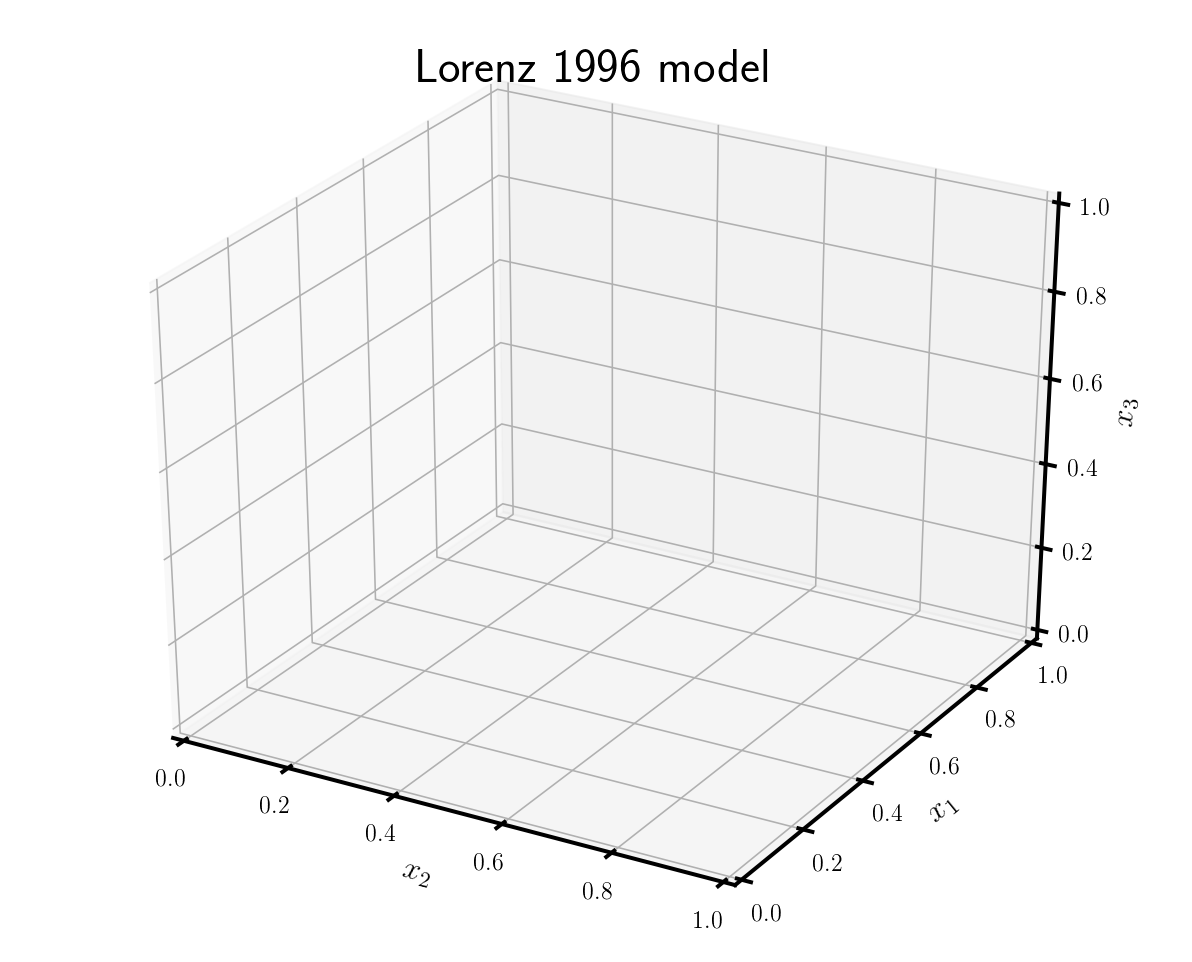

In [42]:
fig = plt.figure(figsize=(10,8))
#ax = fig.gca(projection='3d')
ax = fig.add_subplot(111, projection='3d')
ax.plot(-x2[380000:], x1[380000:], x3[380000:],lw=0.5)
ax.set_xlabel("$x_2$")
ax.set_ylabel("$x_1$")
#plt.xlim(4, -12)
ax.set_zlabel("$x_3$")
ax.set_title("Lorenz 1996 model")
plt.show()

In [31]:

        for c in range(I*J):
            yjj[c] = xylist[(I+J*I)*(step-1):(I+J*I)*(step)][I:][c]
        for a in range(I):
            xnow[a] = xylist[(I+J*I)*(step-1):(I+J*I)*(step)][0:I][a]
            xjj[a,:] = xylist[(I+J*I)*(step-1):(I+J*I)*(step)][0:I][a]
        for iii in range(I):
            xjj = J4LE(xnow,xjj,yjj,iii) # at this time 
        print(xjj)

        
        
        DF1 = RK4JJ(Jt,DF1,Df,i)


    
        

IndentationError: unexpected indent (<ipython-input-31-138125c24a82>, line 2)

In [ ]:
def LEcalc(x1,x4jj):
    
    z = np.identity(m)
    #Jt = A*x    for DF1, A： current Df
    
    for i in range(N):
        DF1 = np.identity(m)
        
        for step in np.arange(1,1/dt,1):    
            DF1 = RK4JJ(Jt,DF1,Df,i)
            
            #maybe should add time phase for x1 during x1 to parellal moving with JACOBIAN
    
        Z = DF1*q
        q, r = qr(Z) = np.linalg.qr(Z)
        #LE[]= LE[] + np.log(np.amax(np.absolute(np.diag(r))))/(N)
        LE = LE + log(abs(diag(r)))/totstep
        
    return LE

In [ ]:
m = length(xnow)
LE = zeros(m,1)
v = v0;

q = eye(m)
Jt = @(x,A) A*x     % ode for DF1, 'A' will be current Df
% Jacobian Df is jj

for i=1:N
    DF = eye(m)     % initialize derivative of time-1 map
    for j = 1:1/tstep

        DF = stepit(Jt,DF,Df(v,param),tstep)
        v = stepit(f,v,param,tstep)
        
    Z = DF1*q
    [q,r] = qr(Z)
    LE = LE + log(abs(diag(r)))/N
%LE = LE/N;

LEcalc(f,Df,x(:,end))

In [ ]:
print(LE)          
plt.imshow(LE, cmap=plt.cm.jet)
cb = plt.colorbar(label='LE', pad=0.1)
plt.axes().set_aspect('equal')
plt.show()

In [ ]:
def LEcalc(x1,x4jj):
    q = np.identity(m)
    #Jt = A*x    for DF1, A： current Df
    
    for i in range(N):
        DF1 = np.identity(m)
        
        for step in np.arange(1,totstep,1):    
            #DF1 = RK4JJ(Jt,DF1,Df,i,j)
            #maybe should add time phase for x1 during x1 to parellal moving with JACOBIAN
    
        Z = DF1*q
        q, r = qr(Z) = np.linalg.qr(Z)
        #LE[]= LE[] + np.log(np.amax(np.absolute(np.diag(r))))/(N)
        LE = LE + log(abs(diag(r)))/totstep
        
        
    return LE

In [ ]:
#m = len(x1)
#N = 10000
#LE = np.zeros(m)
#v = x1
#LE = np.zeros((Jmax-4,Imax-4))

In [ ]:
[LE] = LEcalc(f,Df,v0)

m = length(v0);
N = 10000;
LE = zeros(m,1);
v = v0;

q = eye(m);
Jt = @(x,A) A*x; % ode for DF1, 'A' will be current Df
% Jacobian
Df is jj

for i=1:N
    DF1 = eye(m); % initialize derivative of time-1 map
    for j = 1:1/tstep

        DF1 = stepit(Jt,DF,Df(v,param),tstep);	% 3 x 3 matrix
        v = stepit(f,v,param,tstep);
        
    Z = DF1*q;
    [q,r] = qr(Z);
    LE = LE + log(abs(diag(r)))/N;
%LE = LE/N;

LEcalc(f,Df,x(:,end))
